<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)" data-toc-modified-id="Prediction-Accuracy-(Comparison-of-all-users-predictions-with-model-trained-on-50-users)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics</a></span><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Benchmark</a></span></li></ul></li><li><span><a href="#Accuracy-for-all-guesses" data-toc-modified-id="Accuracy-for-all-guesses-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Accuracy for all guesses</a></span><ul class="toc-item"><li><span><a href="#All-guesses-accuracy-(PDF)" data-toc-modified-id="All-guesses-accuracy-(PDF)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>All guesses accuracy (PDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(CDF)" data-toc-modified-id="All-guesses-accuracy-(CDF)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>All guesses accuracy (CDF)</a></span></li><li><span><a href="#All-guesses-accuracy-(Boxplot)" data-toc-modified-id="All-guesses-accuracy-(Boxplot)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>All guesses accuracy (Boxplot)</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn" data-toc-modified-id="Accuracy-by-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Accuracy by turn</a></span><ul class="toc-item"><li><span><a href="#Accuracy-by-turn-(single-user)" data-toc-modified-id="Accuracy-by-turn-(single-user)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Accuracy by turn (single user)</a></span><ul class="toc-item"><li><span><a href="#First-trained-user" data-toc-modified-id="First-trained-user-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>First trained user</a></span></li><li><span><a href="#Mid-point-trained-user" data-toc-modified-id="Mid-point-trained-user-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Mid-point trained user</a></span></li><li><span><a href="#Last-trained-user" data-toc-modified-id="Last-trained-user-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>Last trained user</a></span></li></ul></li><li><span><a href="#Accuracy-by-turn-(mean-of-all-users)" data-toc-modified-id="Accuracy-by-turn-(mean-of-all-users)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Accuracy by turn (mean of all users)</a></span></li></ul></li><li><span><a href="#Accuracy-by-game-stages" data-toc-modified-id="Accuracy-by-game-stages-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy by game stages</a></span><ul class="toc-item"><li><span><a href="#Opening-accuracy" data-toc-modified-id="Opening-accuracy-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Opening accuracy</a></span></li><li><span><a href="#Middlegame-accuracy" data-toc-modified-id="Middlegame-accuracy-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Middlegame accuracy</a></span></li><li><span><a href="#Endgame-accuracy-(Upper-limit-at-100-turns)" data-toc-modified-id="Endgame-accuracy-(Upper-limit-at-100-turns)-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Endgame accuracy (Upper limit at 100 turns)</a></span></li><li><span><a href="#Endgame-accuracy-(No-upper-limit-for-turns)" data-toc-modified-id="Endgame-accuracy-(No-upper-limit-for-turns)-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Endgame accuracy (No upper limit for turns)</a></span></li><li><span><a href="#Game-stages-comparison-(Boxplot)" data-toc-modified-id="Game-stages-comparison-(Boxplot)-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Game stages comparison (Boxplot)</a></span></li></ul></li></ul></li></ul></div>

# Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [88]:
#OS libs
import os
# File management
from util_functions.file_management import (filter_by, sort_by, split_pred, split_data)
from util_functions.plot_predictions import (get_stats_for_all_predictions,
                                             plot_pdf_multiple_users,
                                             plot_cdf_multiple_users,
                                             plot_boxplot_multiple_users,
                                             get_stats_for_predictions_by_turn,
                                             plot_single_acc_by_turn,
                                             get_mean_of_predictions_by_turn,
                                             get_predictions_by_game_stage_from_turn,
                                             boxplot_game_stages, boxplot_game_stages_w_benchmark)
#Data handling libs
import pandas as pd
# Meta-data
data_folder = os.path.join(os.getcwd(),'dt_chess','datasets')
losses_folder = os.path.join(os.getcwd(),'dt_chess','training_losses')
dt_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_predictions')
benchmark_pred_folder = os.path.join(os.getcwd(),'dt_chess','datasets_test_benchmark')
pred_files = os.listdir(dt_pred_folder)
bench_pred_files = os.listdir(benchmark_pred_folder)
model_size = 50
all_acc_stats = ["top_1_accuracy", "engine_choice_2_accuracy", "engine_choice_3_accuracy",
                 "top_2_accuracy", "top_3_accuracy"]
top_k_acc = ["top_1_accuracy", "top_2_accuracy", "top_3_accuracy"]
all_acc_stats_bench = ["benchmark_top_1_accuracy", "benchmark_engine_choice_2_accuracy",
                 "benchmark_engine_choice_3_accuracy", "benchmark_top_2_accuracy",
                 "benchmark_top_3_accuracy"]
top_k_acc_bench = ["benchmark_top_1_accuracy", "benchmark_top_2_accuracy", "benchmark_top_3_accuracy"]
hist_stat='count'

# Prediction Accuracy (Comparison of all users predictions with model trained on 50 users)

## Descriptive statistics

### Model

In [3]:
pred_files_model = filter_by(pred_files, split_pred, num_users=model_size)
pred_files_model = sort_by(pred_files_model, split_pred, [('user_id', True)])
pred_files_model[:5]

['convolutional_50_400_Jiyarkhan_1.csv',
 'convolutional_50_399_Attila-72_1.csv',
 'convolutional_50_398_PaquitodeRivera_1.csv',
 'convolutional_50_397_Lombardi_1.csv',
 'convolutional_50_396_JethrofDCascalla_1.csv']

In [4]:
model_stats_df = get_stats_for_all_predictions(dt_pred_folder, pred_files_model, data_folder)
model_stats_df.index += 1
display(model_stats_df.head().style.format(thousands=','))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:10<00:00,  3.80s/it]


In [5]:
model_stats_df.describe()[all_acc_stats]

top_1_accuracy  engine_choice_2_accuracy  engine_choice_3_accuracy  \
count       50.000000                 50.000000                 50.000000   
mean        25.770715                 13.517800                  8.843472   
std          1.724775                  0.571634                  0.269617   
min         23.335251                 12.337364                  8.255823   
25%         24.634362                 13.165441                  8.652346   
50%         25.489313                 13.535082                  8.853807   
75%         26.843182                 13.802360                  8.999765   
max         33.091435                 15.507209                  9.627516   

       top_2_accuracy  top_3_accuracy  
count       50.000000       50.000000  
mean        39.288515       48.131987  
std          2.260552        2.473833  
min         35.720010       43.975833  
25%         37.662026       46.344530  
50%         39.006205       47.896688  
75%         40.826678       49.770155  
max         48.598643       58.226159

In [6]:
model_stats_df[model_stats_df['top_1_accuracy'] > 28]

total     fp    tp1    tp2    tp3     tn1    tn2    tn3  top_1_accuracy  \
17  131406  10660  36846  19178  11912   94560  75382  63470       28.039816   
21  141412  12051  39637  20419  13237  101775  81356  68119       28.029446   
50  134905  11353  44642  20920  12988   90263  69343  56355       33.091435   

    engine_choice_2_accuracy  engine_choice_3_accuracy  top_2_accuracy  \
17                 14.594463                  9.065035       42.634278   
21                 14.439369                  9.360592       42.468815   
50                 15.507209                  9.627516       48.598643   

    top_3_accuracy  
17       51.699314  
21       51.829406  
50       58.226159

### Benchmark

In [7]:
bench_pred_files_model = sort_by(bench_pred_files, split_data, [('id', True)])[:model_size]
bench_stats_df = get_stats_for_all_predictions(benchmark_pred_folder, bench_pred_files_model,
                                               data_folder, split_type=split_data)
bench_stats_df.index += 1
display(bench_stats_df.head().style.format(thousands=','))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:04<00:00,  3.69s/it]


In [8]:
for i in range(len(all_acc_stats)):
    bench_stats_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]}, inplace=True)
bench_stats_df.describe()[all_acc_stats_bench]

benchmark_top_1_accuracy  benchmark_engine_choice_2_accuracy  \
count                 50.000000                           50.000000   
mean                  49.833976                           18.939501   
std                    2.472852                            0.300187   
min                   41.332790                           18.248509   
25%                   49.007683                           18.784023   
50%                   50.621321                           18.936195   
75%                   51.319514                           19.155022   
max                   53.962843                           19.545770   

       benchmark_engine_choice_3_accuracy  benchmark_top_2_accuracy  \
count                           50.000000                 50.000000   
mean                             9.733561                 68.773477   
std                              0.216746                  2.690309   
min                              9.250995                 59.581299   
25%                              9.595951                 68.004099   
50%                              9.702570                 69.591794   
75%                              9.858724                 70.447342   
max                             10.279087                 73.270345   

       benchmark_top_3_accuracy  
count                 50.000000  
mean                  78.507038  
std                    2.548002  
min                   69.791814  
25%                   77.694431  
50%                   79.336582  
75%                   80.076800  
max                   82.521340

## Accuracy for all guesses

### All guesses accuracy (PDF)

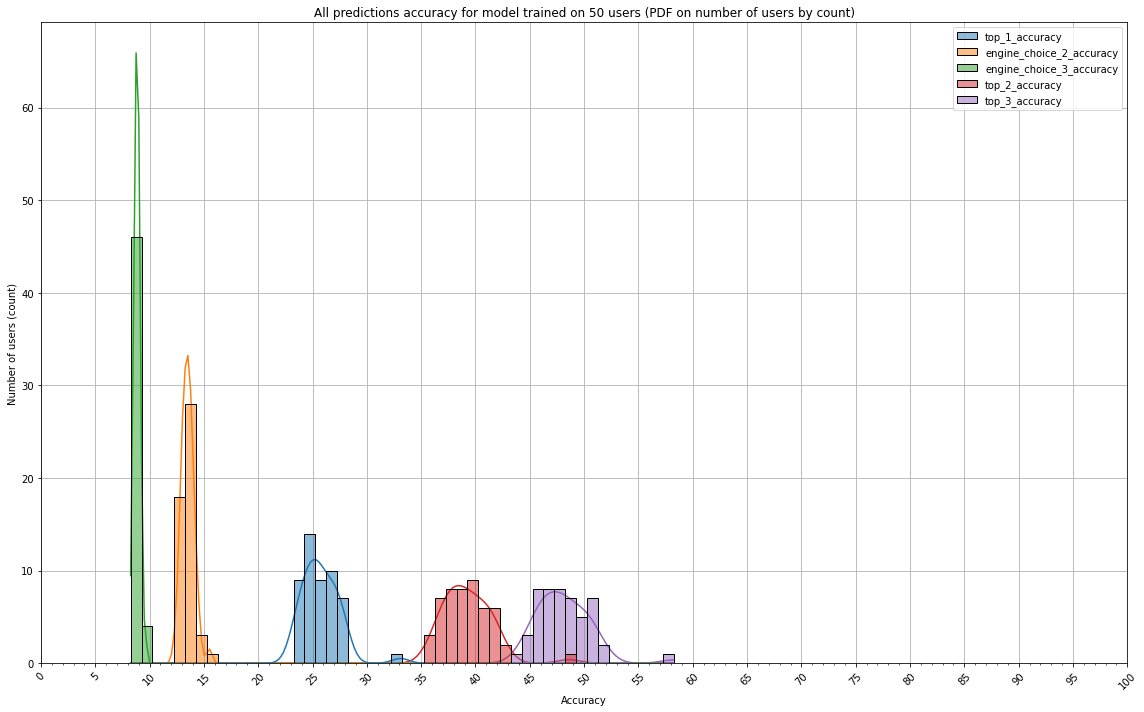

In [9]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, all_acc_stats, hist_stat=hist_stat)

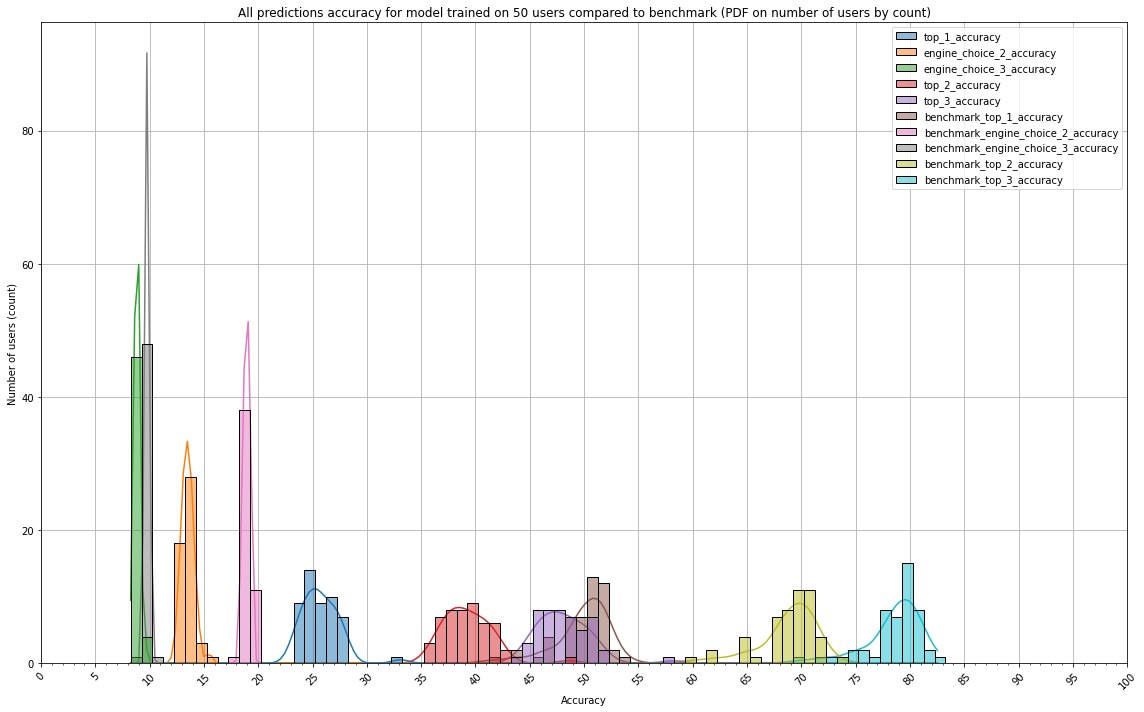

In [10]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        all_acc_stats + all_acc_stats_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

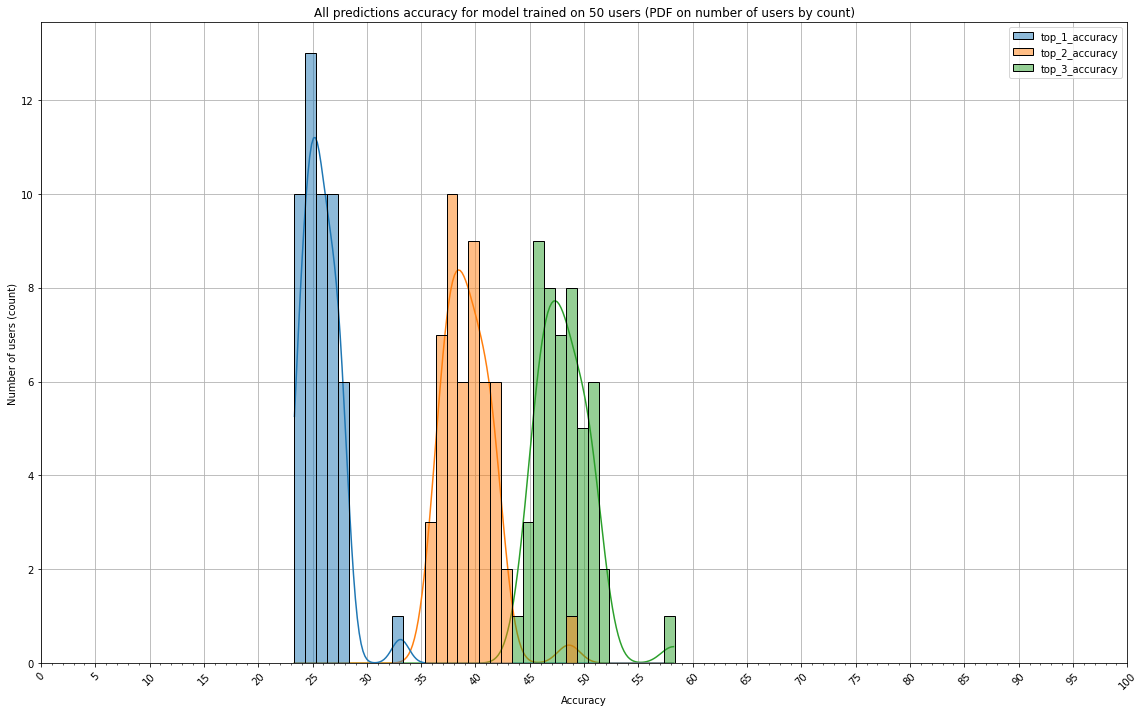

In [11]:
%matplotlib inline
plot_pdf_multiple_users(model_stats_df, top_k_acc, hist_stat=hist_stat)

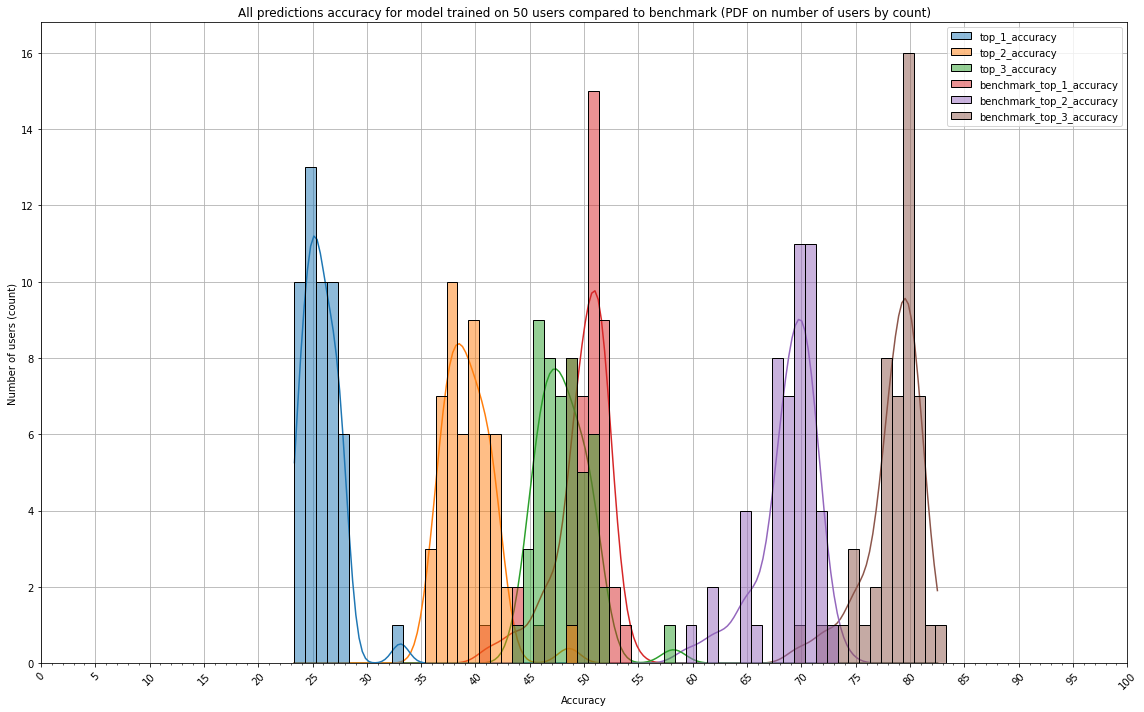

In [12]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark "
                               f"(PDF on number of users by {hist_stat})"))

### All guesses accuracy (CDF)

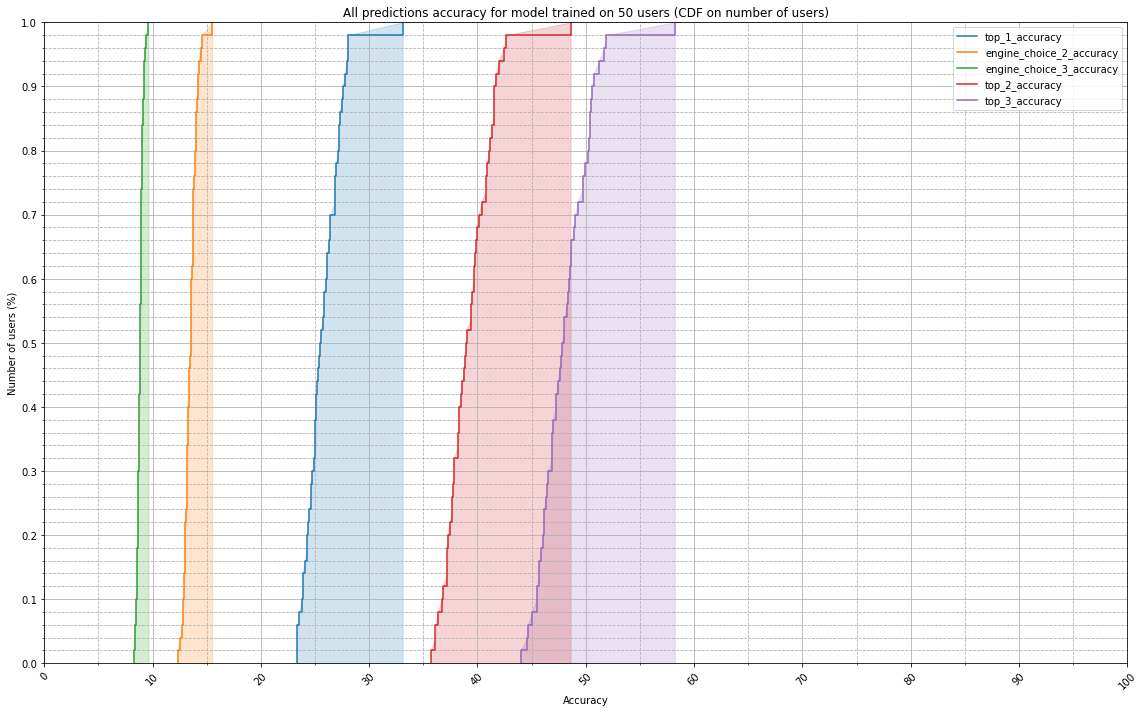

In [13]:
%matplotlib inline
plot_cdf_multiple_users(model_stats_df, all_acc_stats)

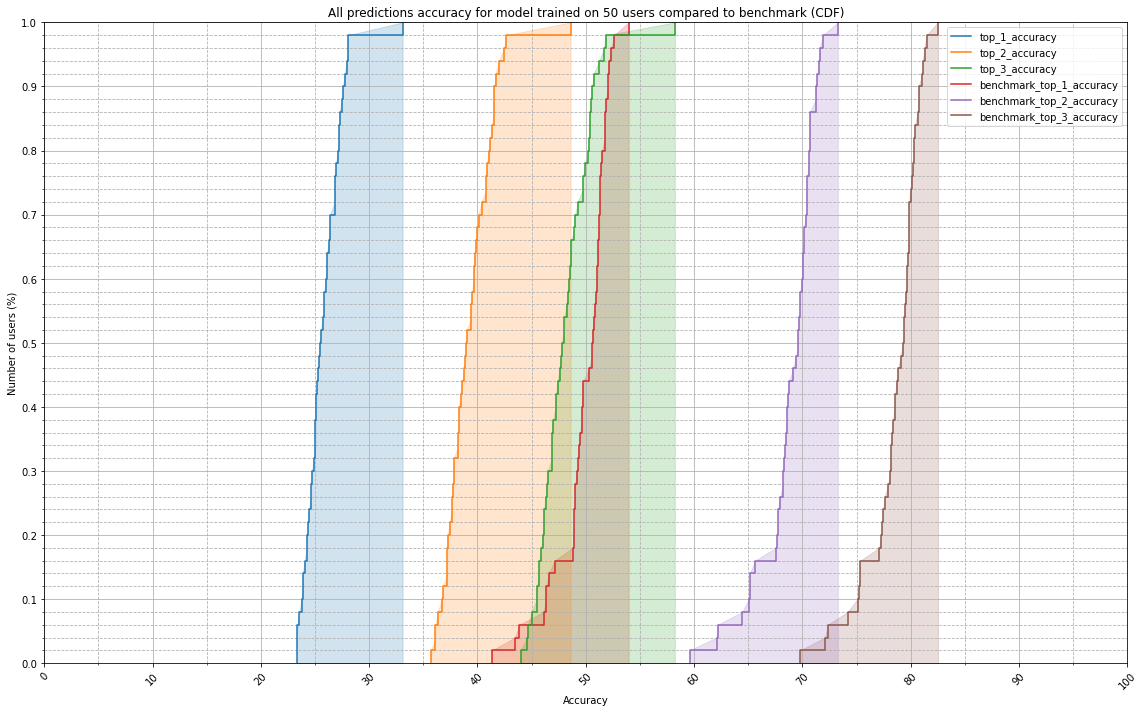

In [14]:
%matplotlib inline
plot_cdf_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                        top_k_acc + top_k_acc_bench,
                        title=(f"All predictions accuracy for model trained on "
                               f"{len(model_stats_df)} users compared to benchmark (CDF)"))

### All guesses accuracy (Boxplot)

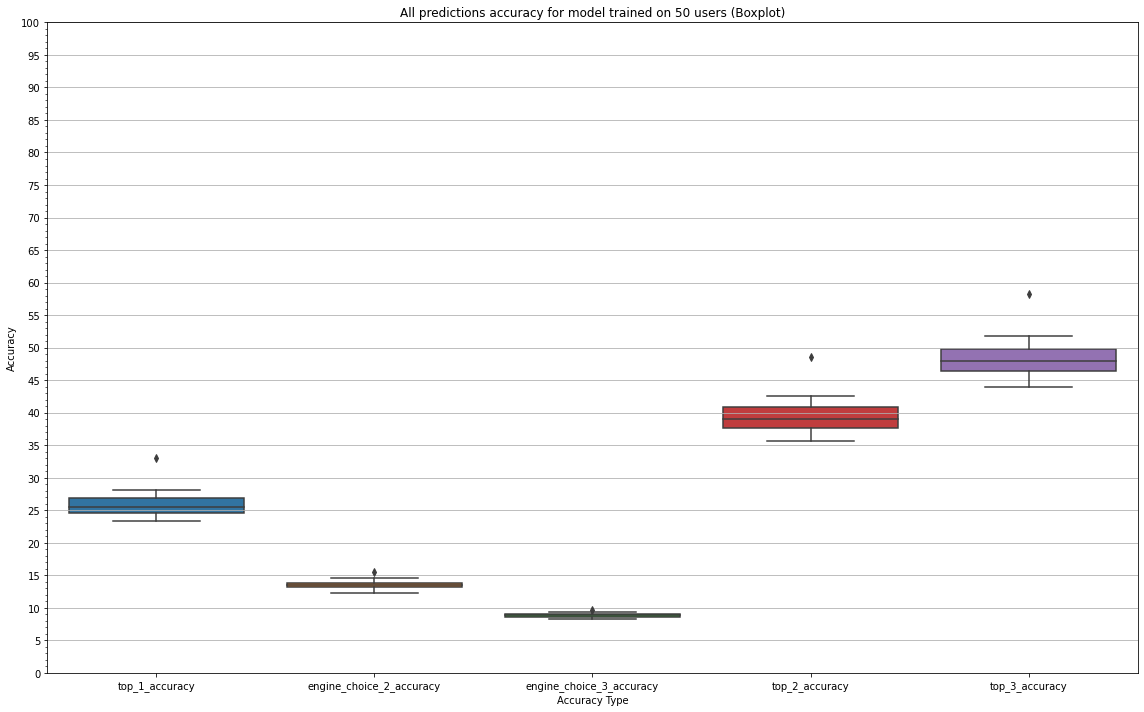

In [15]:
%matplotlib inline
plot_boxplot_multiple_users(model_stats_df, all_acc_stats)

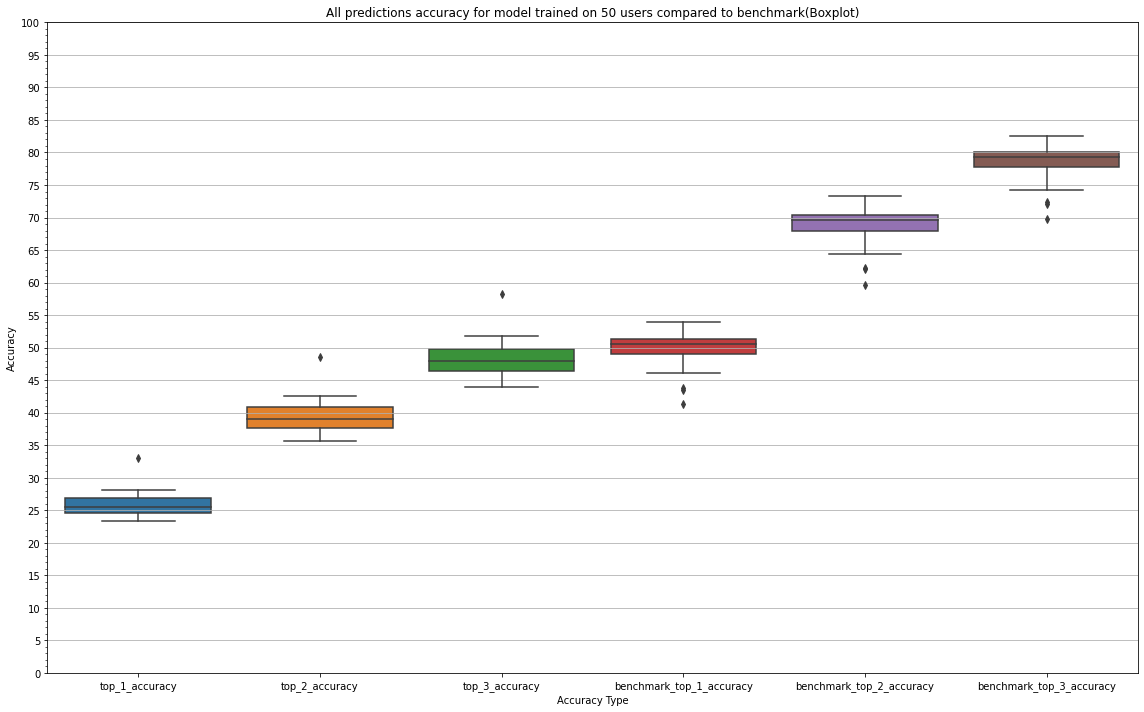

In [16]:
%matplotlib inline
plot_boxplot_multiple_users(pd.concat([model_stats_df, bench_stats_df], axis=1),
                            top_k_acc + top_k_acc_bench,
                            title=("All predictions accuracy for model trained on "
                                   f"{len(model_stats_df)} users compared to benchmark(Boxplot)"))

## Accuracy by turn

### Accuracy by turn (single user)

In [17]:
model_turn_df = get_stats_for_predictions_by_turn(dt_pred_folder, pred_files_model, data_folder)
# display(model_turn_df.head())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:46<00:00,  4.54s/it]


In [32]:
bench_turn_df = get_stats_for_predictions_by_turn(benchmark_pred_folder, bench_pred_files_model,
                                                  data_folder, split_type=split_data)
# display(bench_turn_df.head())

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [02:35<00:00,  3.12s/it]


#### First trained user

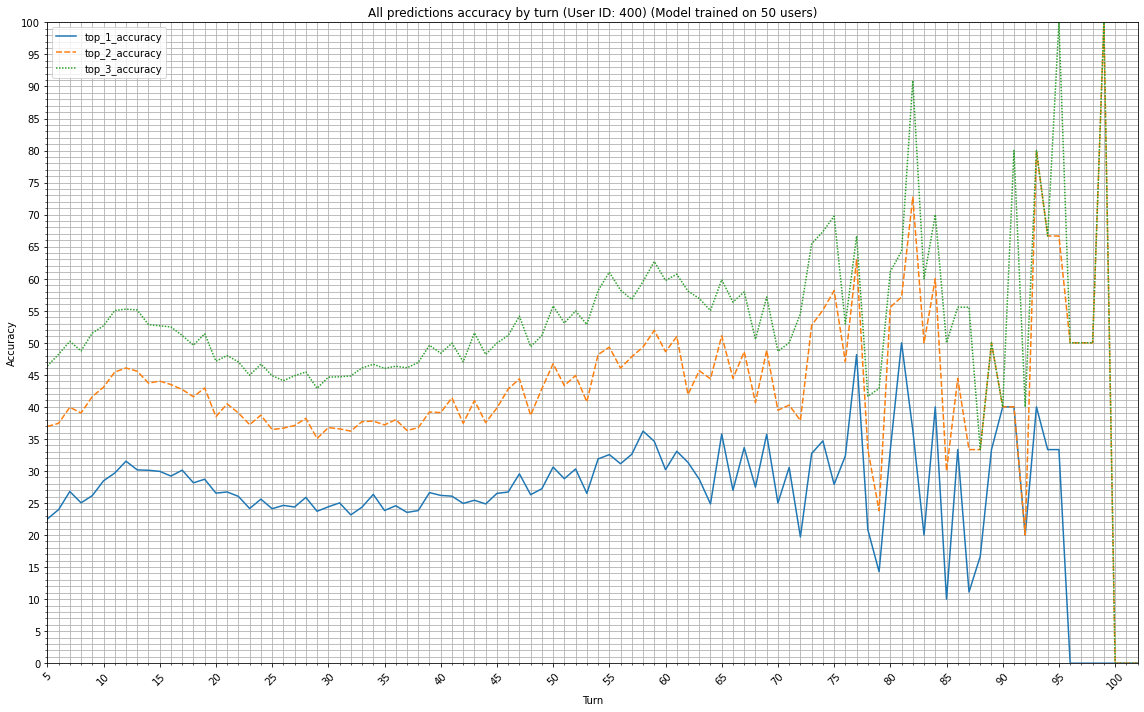

In [50]:
i, _ = (0, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

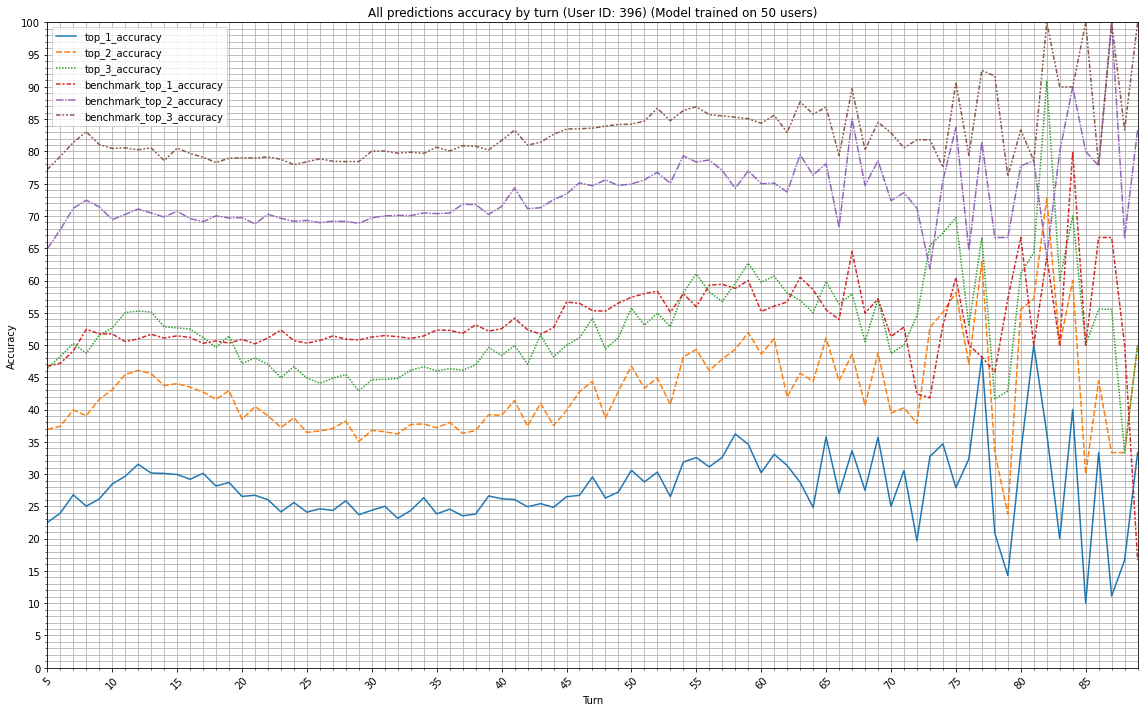

In [59]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

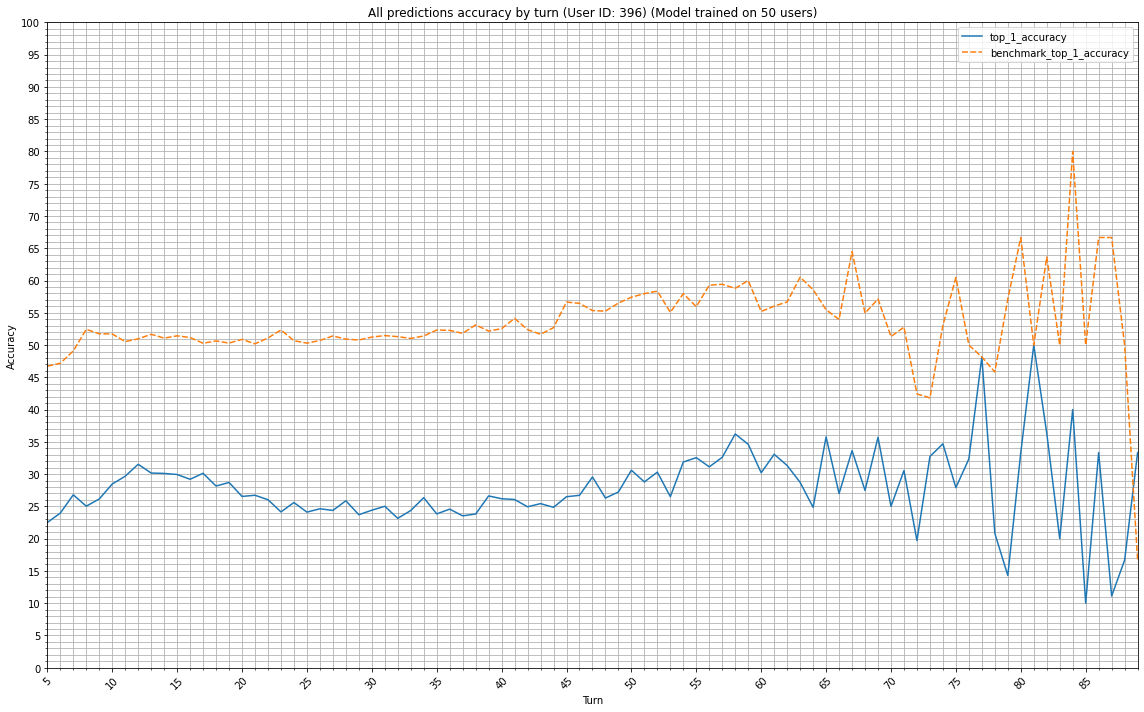

In [60]:
i, turn_cap = (0, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Mid-point trained user

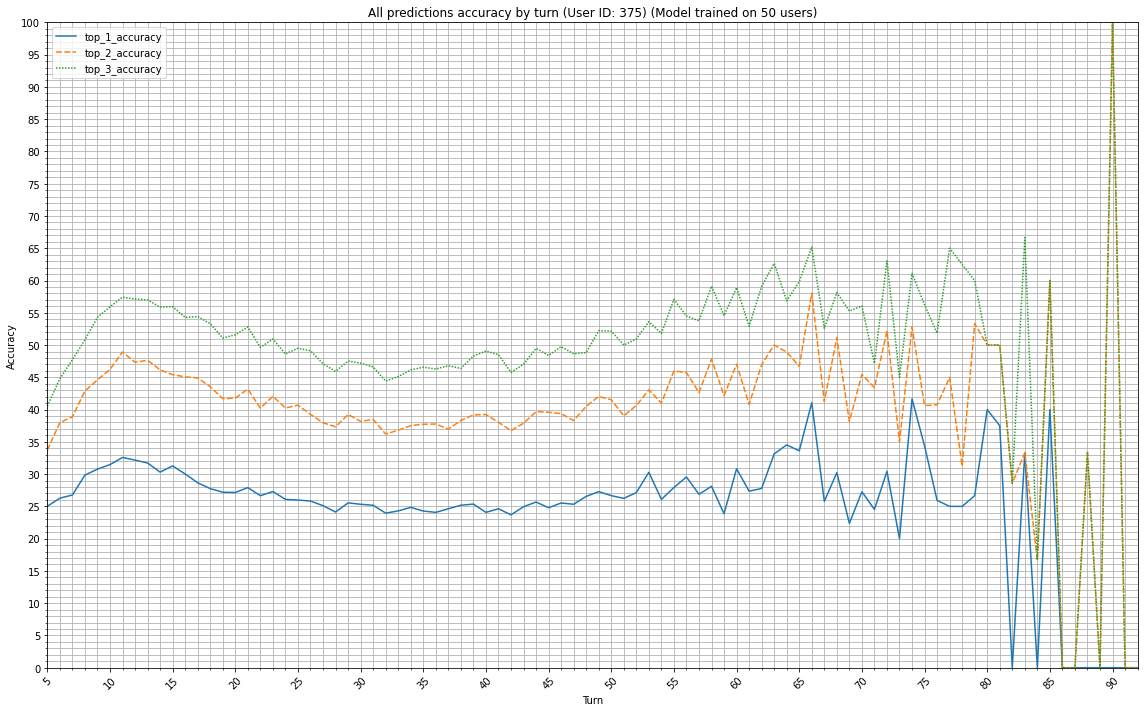

In [49]:
i, _ = (int(len(pred_files_model)/2), 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

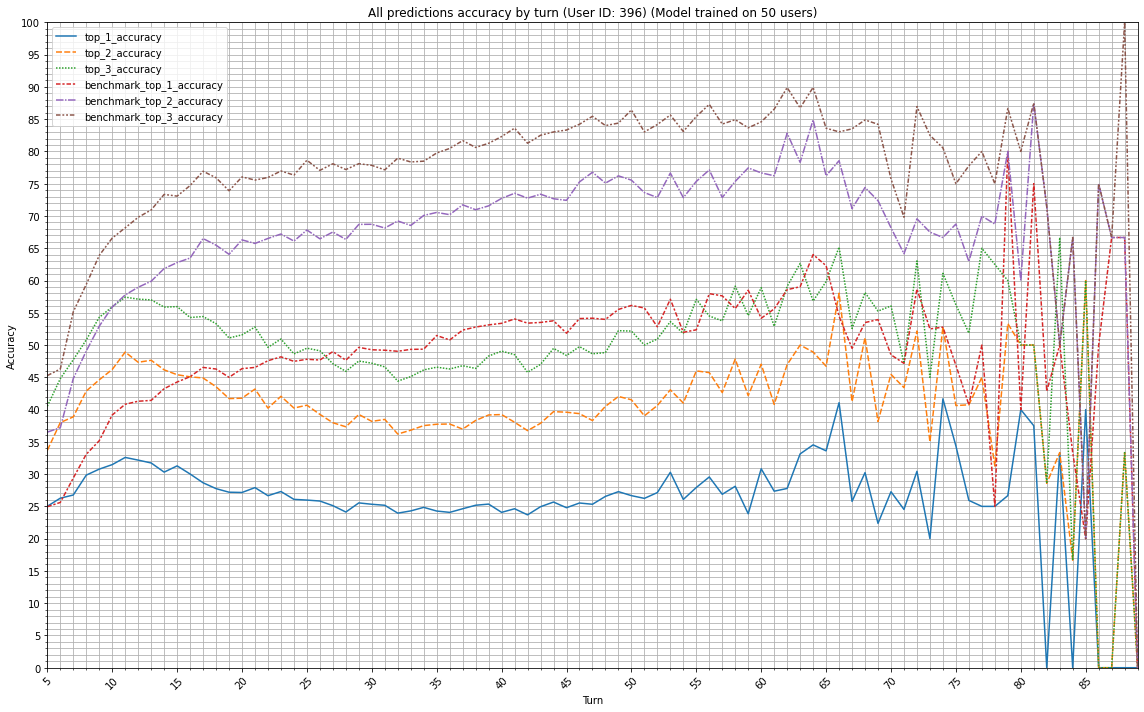

In [61]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

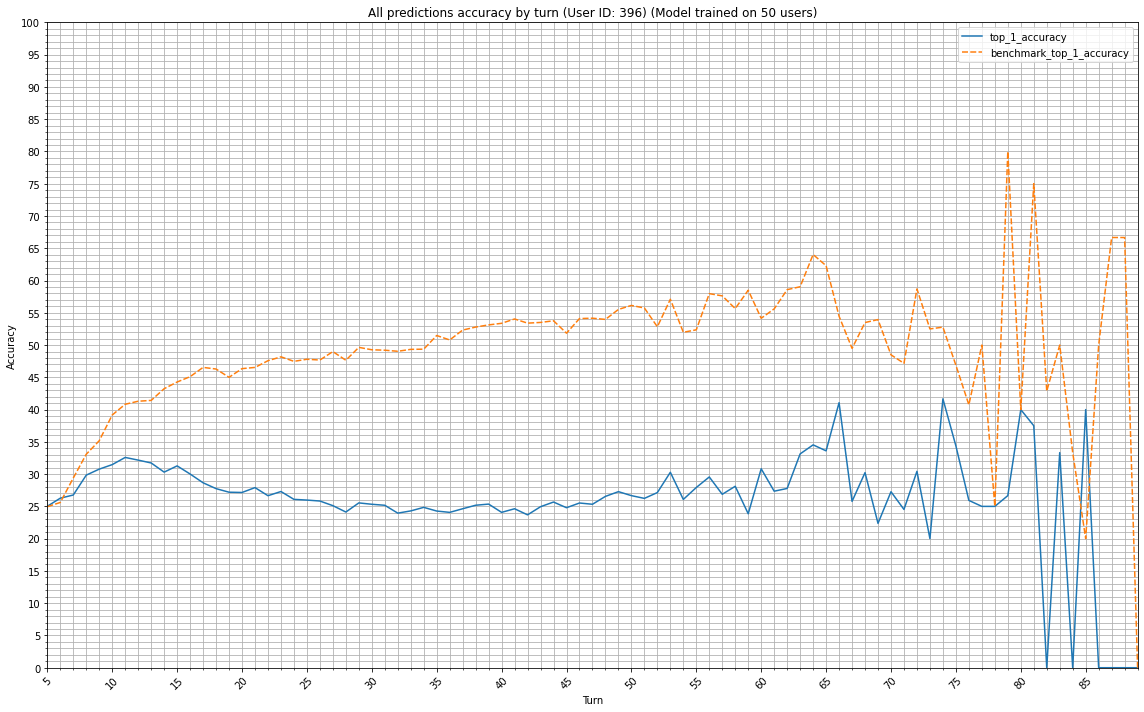

In [62]:
i, turn_cap = (int(len(pred_files_model)/2), 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

#### Last trained user

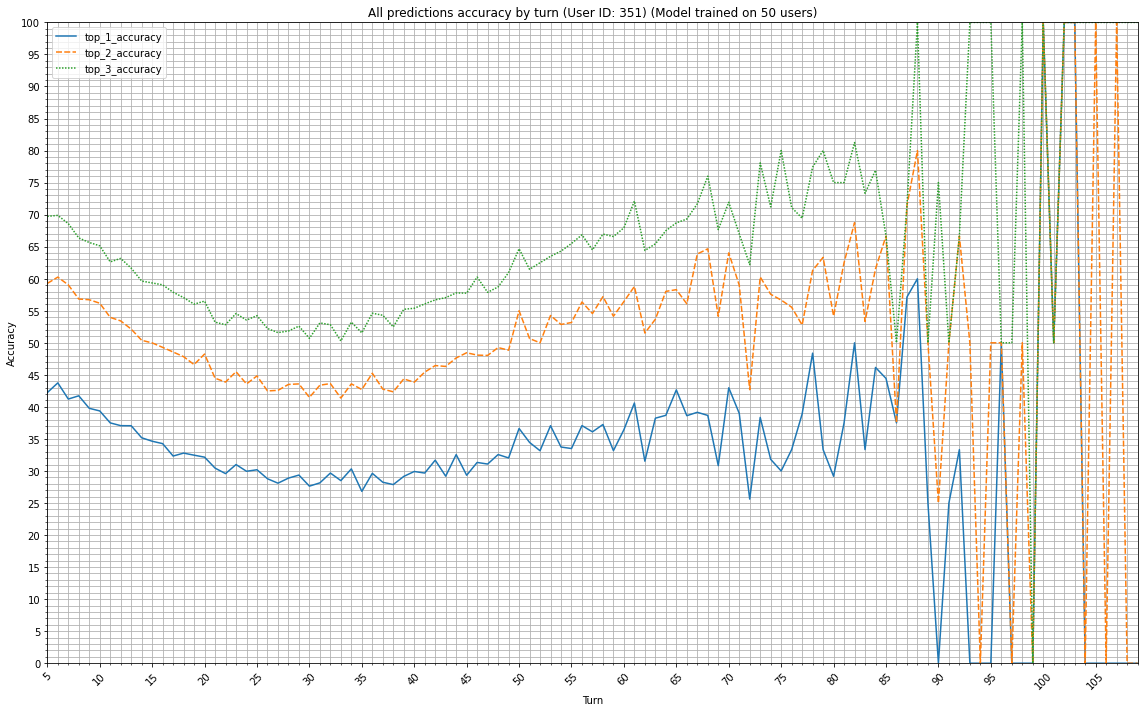

In [48]:
i, _ = (-1, 85)
plot_single_acc_by_turn(model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc],
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

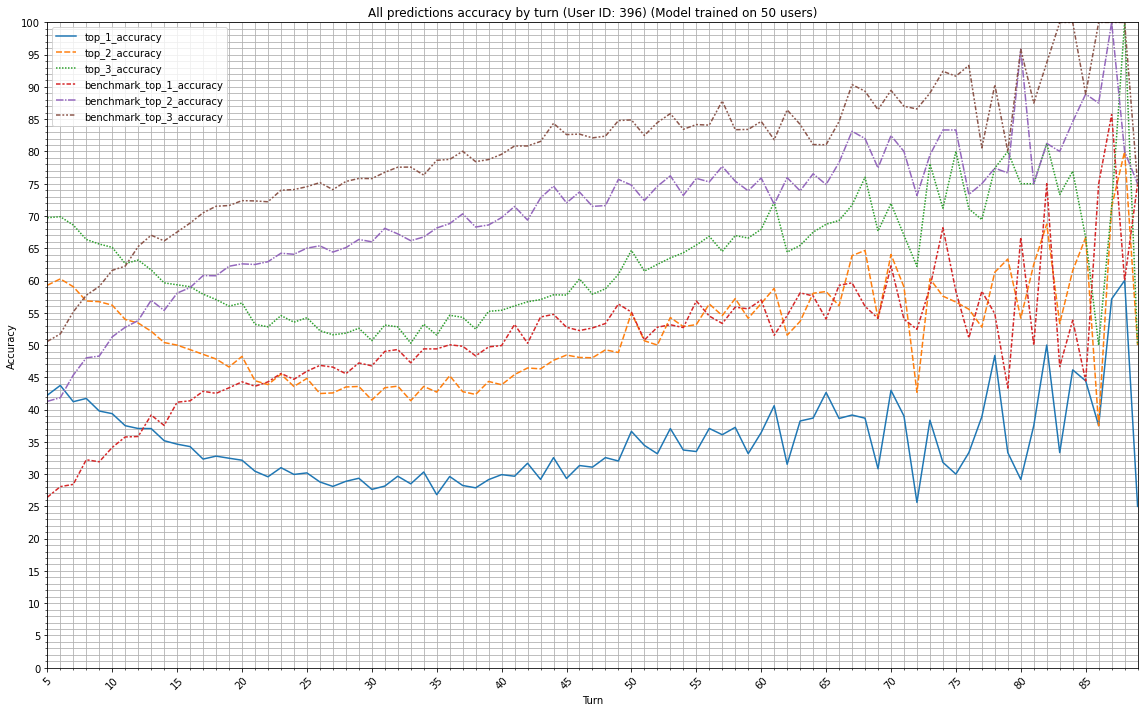

In [63]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

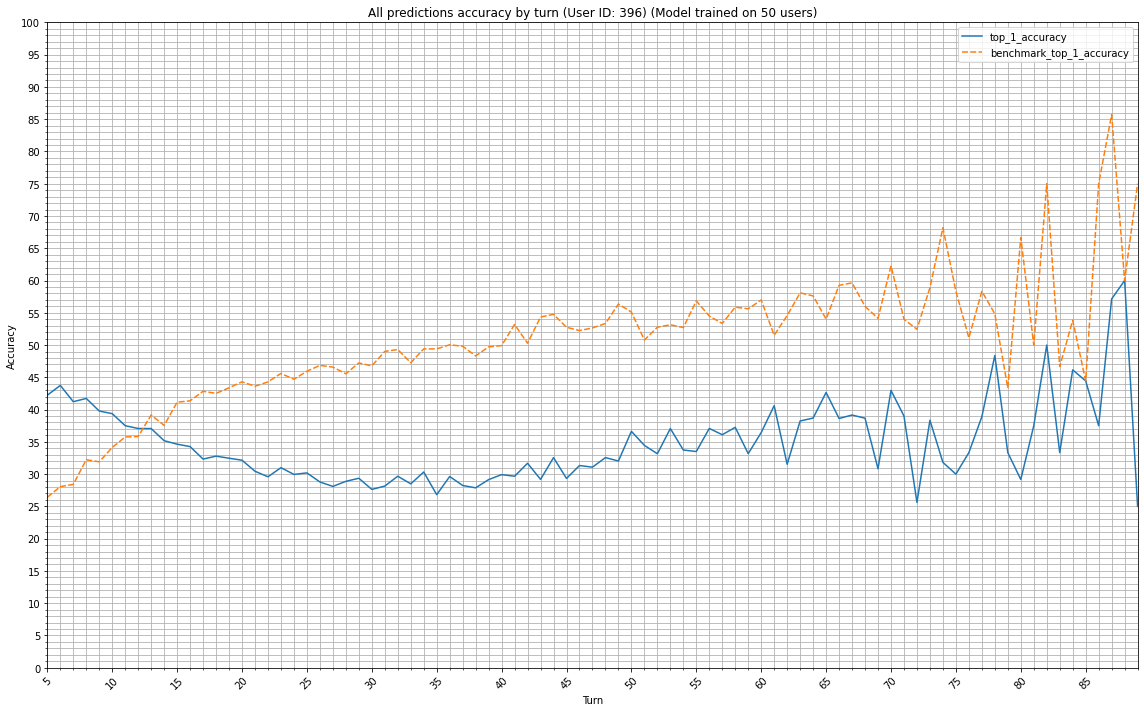

In [64]:
i, turn_cap = (-1, 85)
model_user_turn_df = model_turn_df[pred_files_model[i][:-len('.csv')]][top_k_acc[0]][:turn_cap]
bench_user_turn_df = bench_turn_df[bench_pred_files_model[i][:-len('.csv')]][:turn_cap]
for i in range(len(all_acc_stats)):
    bench_user_turn_df = bench_user_turn_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
bench_user_turn_df = bench_user_turn_df[top_k_acc_bench[0]]
plot_single_acc_by_turn(pd.concat([model_user_turn_df, bench_user_turn_df], axis=1),
                        user_id=split_pred(pred_files_model[i])['user_id'], model_size=len(model_stats_df))

### Accuracy by turn (mean of all users)

In [71]:
model_turn_all_df = get_mean_of_predictions_by_turn(model_turn_df, all_acc_stats)
bench_turn_all_df = get_mean_of_predictions_by_turn(bench_turn_df, all_acc_stats)
for i in range(len(all_acc_stats)):
    bench_turn_all_df = bench_turn_all_df.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
# display(bench_turn_all_df.head())

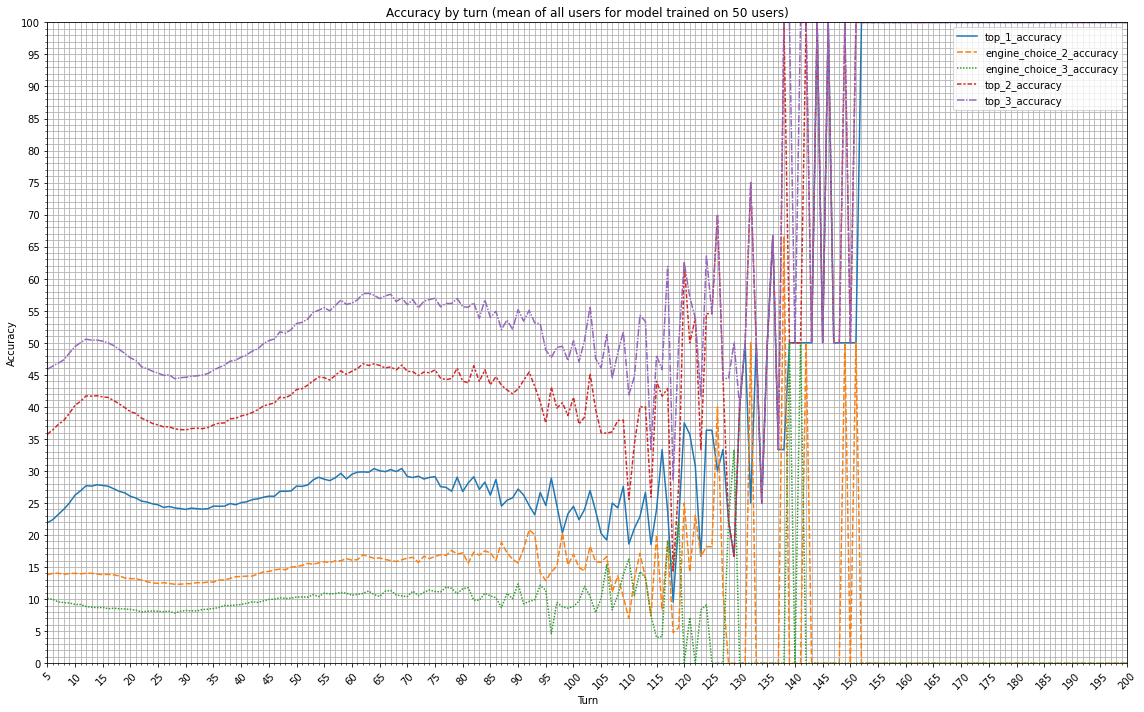

In [23]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

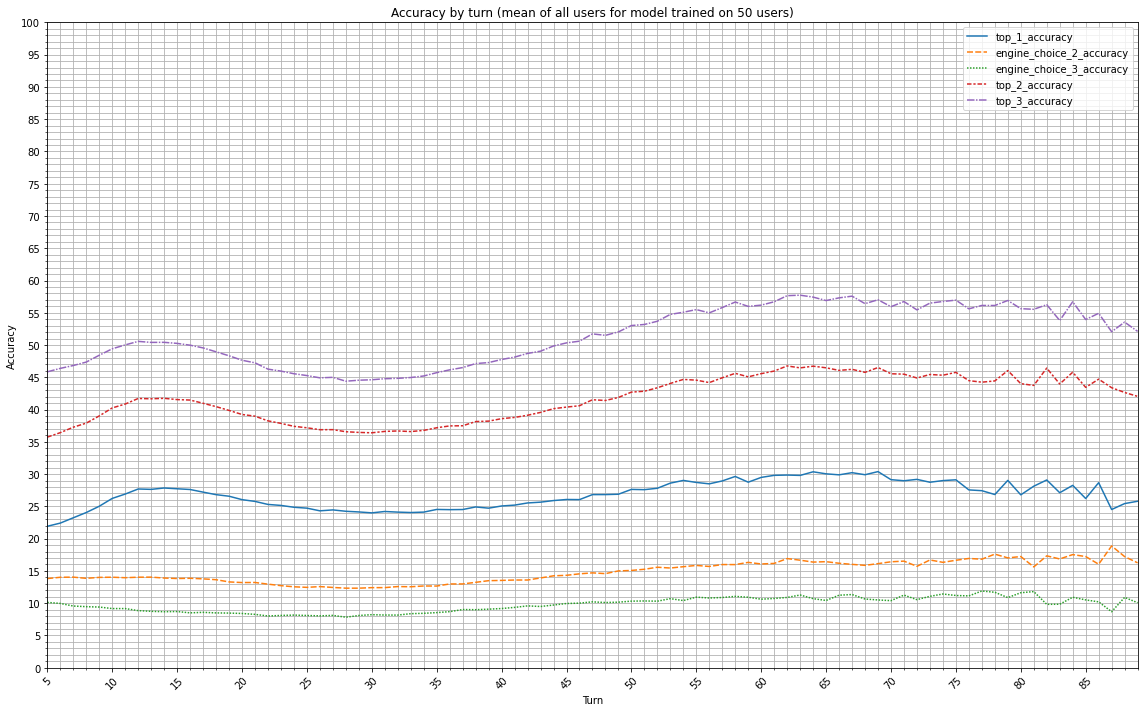

In [72]:
plot_single_acc_by_turn(model_turn_all_df[all_acc_stats][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

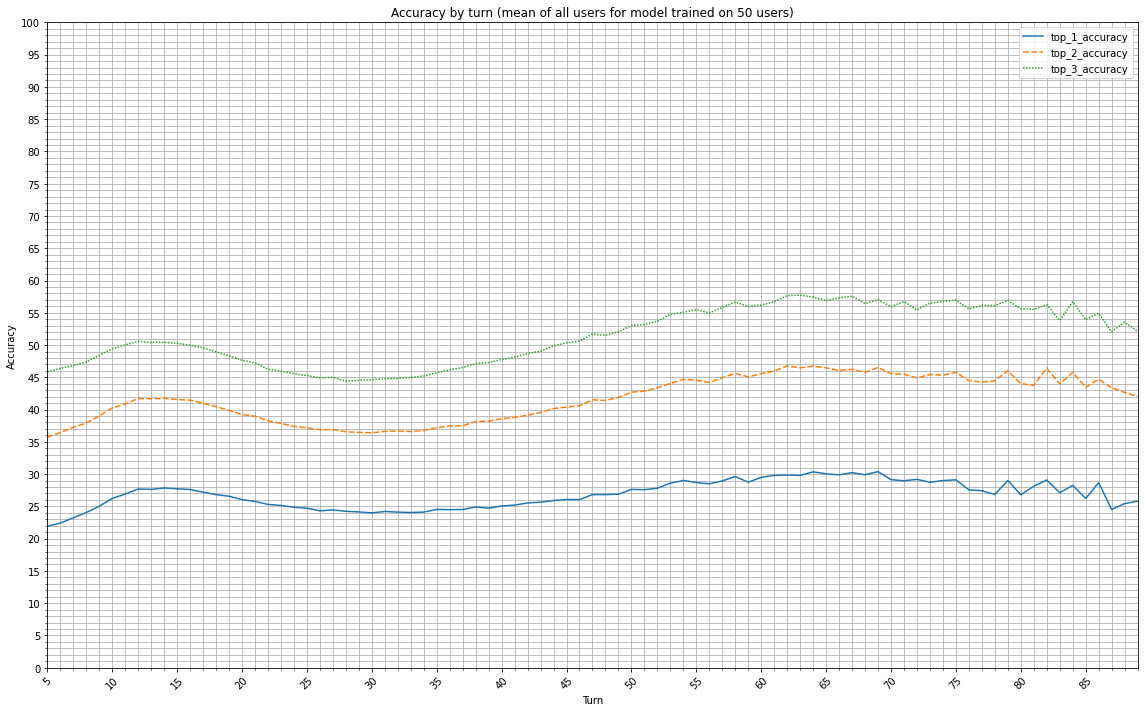

In [73]:
plot_single_acc_by_turn(model_turn_all_df[top_k_acc][:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

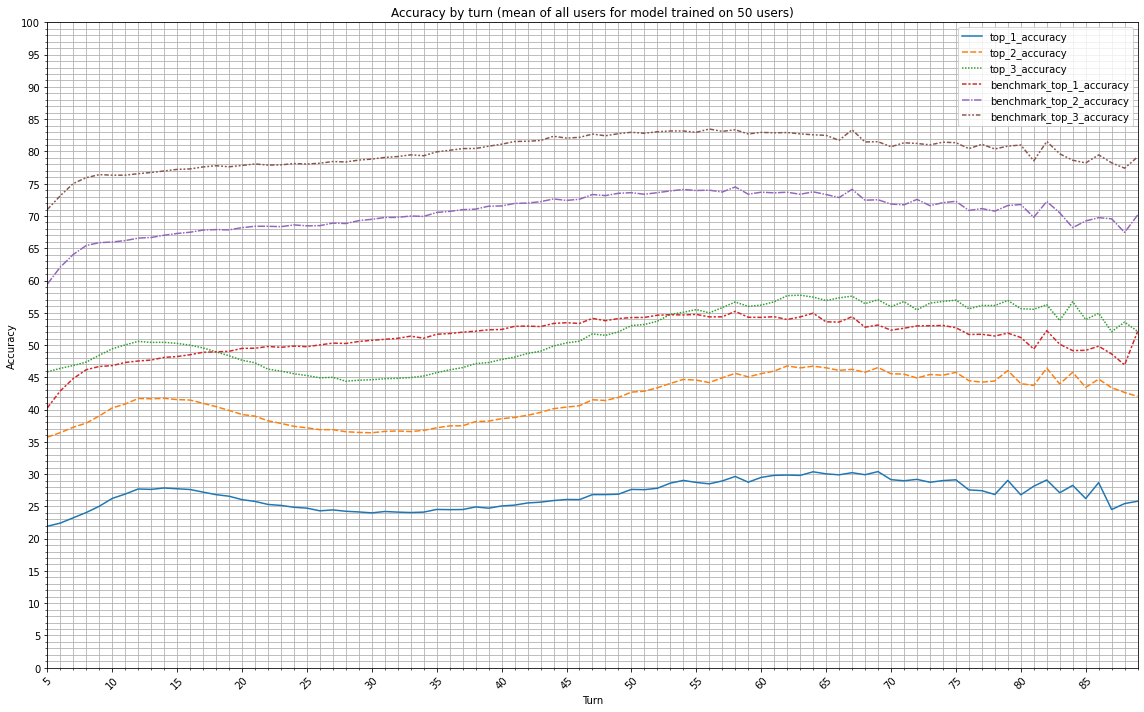

In [75]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc],
                                   bench_turn_all_df[top_k_acc_bench]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

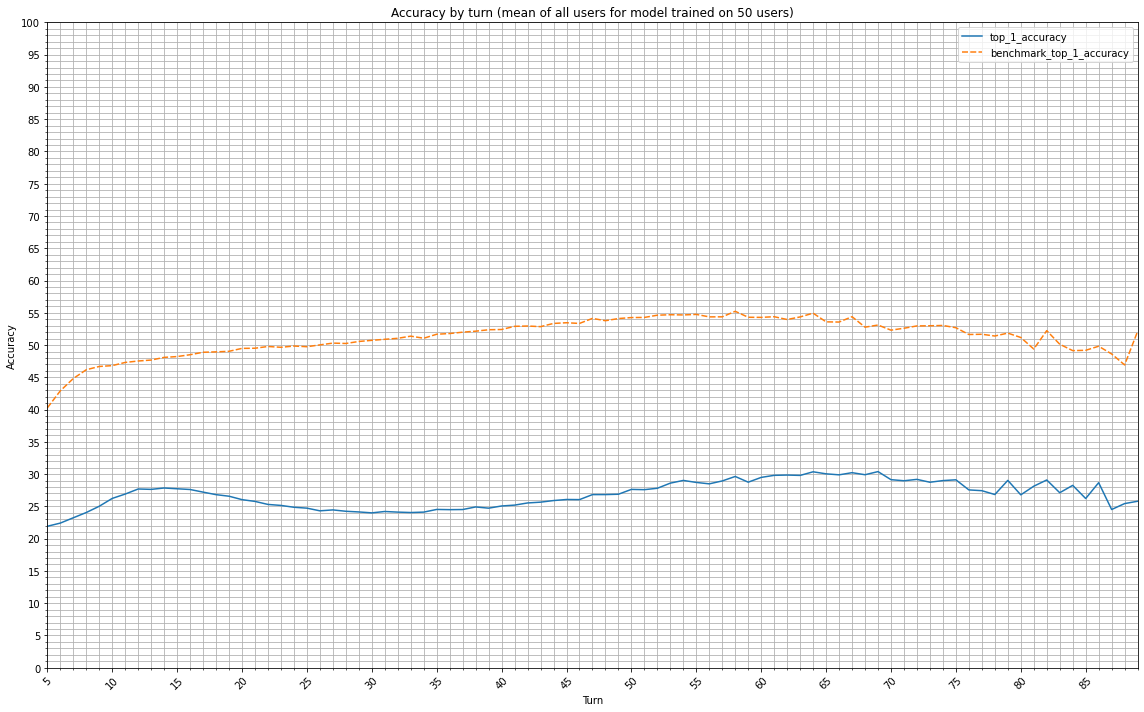

In [78]:
plot_single_acc_by_turn(pd.concat([model_turn_all_df[top_k_acc[0]],
                                   bench_turn_all_df[top_k_acc_bench[0]]], axis=1)[:85],
                        title=("Accuracy by turn (mean of all users for model "
                               f"trained on {len(model_stats_df)} users)"))

## Accuracy by game stages

In [81]:
idx_separate = [15, 40, 100]
df_opening, df_middle, df_end = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate, all_acc_stats)
_, _, df_end_uncapped = get_predictions_by_game_stage_from_turn(model_turn_df, idx_separate[:2], all_acc_stats)
df_opening_bench, df_middle_bench, df_end_bench = get_predictions_by_game_stage_from_turn(bench_turn_df,
                                                                                          idx_separate,
                                                                                          all_acc_stats)
_, _, df_end_uncapped_bench = get_predictions_by_game_stage_from_turn(bench_turn_df, idx_separate[:2],
                                                                      all_acc_stats)
for i in range(len(all_acc_stats)):
    df_opening_bench = df_opening_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_middle_bench = df_middle_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_bench = df_end_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})
    df_end_uncapped_bench = df_end_uncapped_bench.rename(columns={all_acc_stats[i]:all_acc_stats_bench[i]})

### Opening accuracy

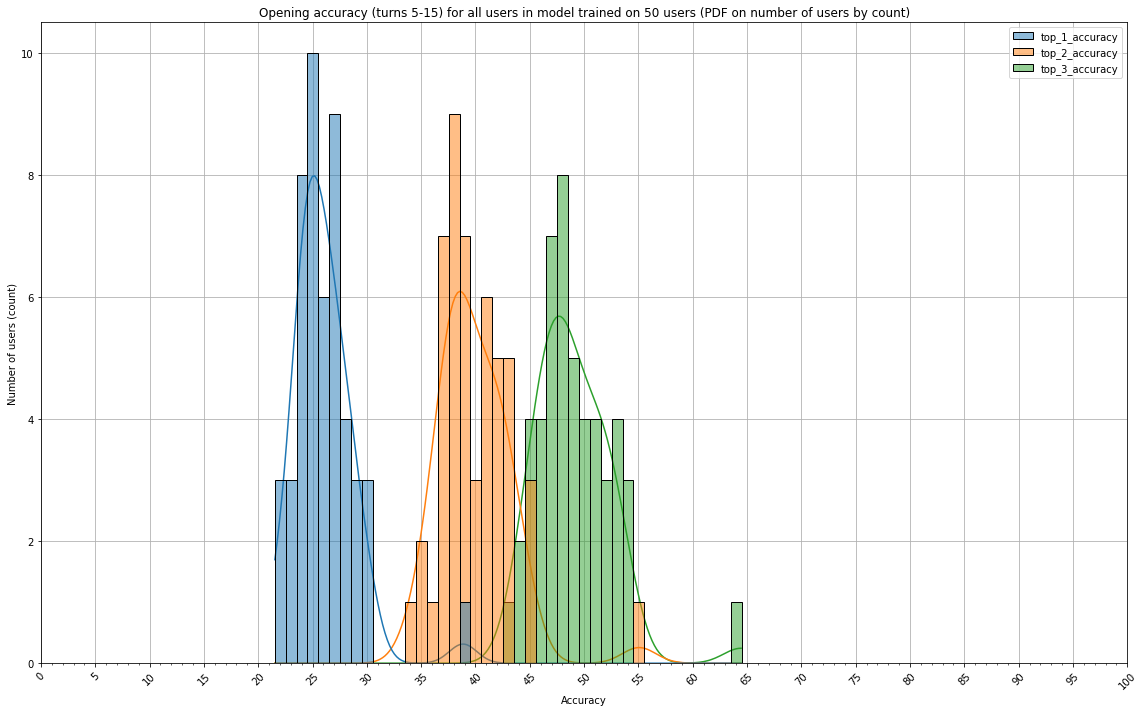

In [82]:
%matplotlib inline
plot_pdf_multiple_users(df_opening, top_k_acc, hist_stat=hist_stat,
                        title=(f"Opening accuracy (turns 5-{idx_separate[0]}) for all users "
                               f"in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

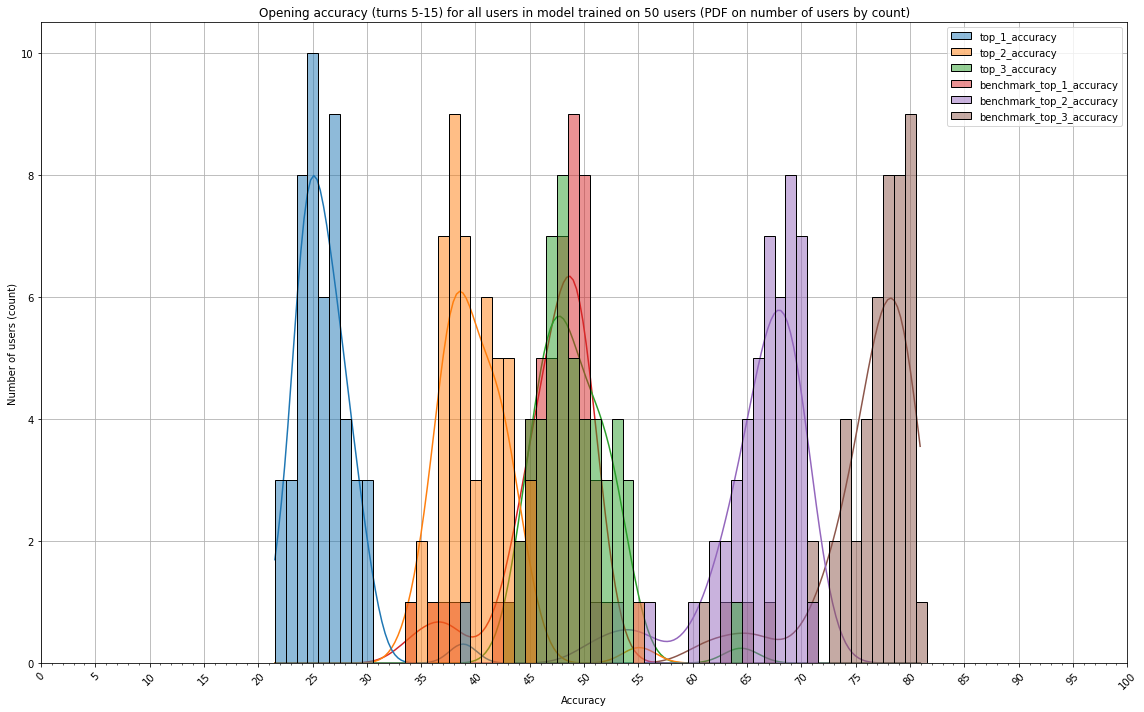

In [83]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_opening, df_opening_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat, title=(f"Opening accuracy (turns 5-{idx_separate[0]}) "
                                                    f"for all users in model trained on {len(model_stats_df)}"
                                                    f" users (PDF on number of users by {hist_stat})"))

### Middlegame accuracy

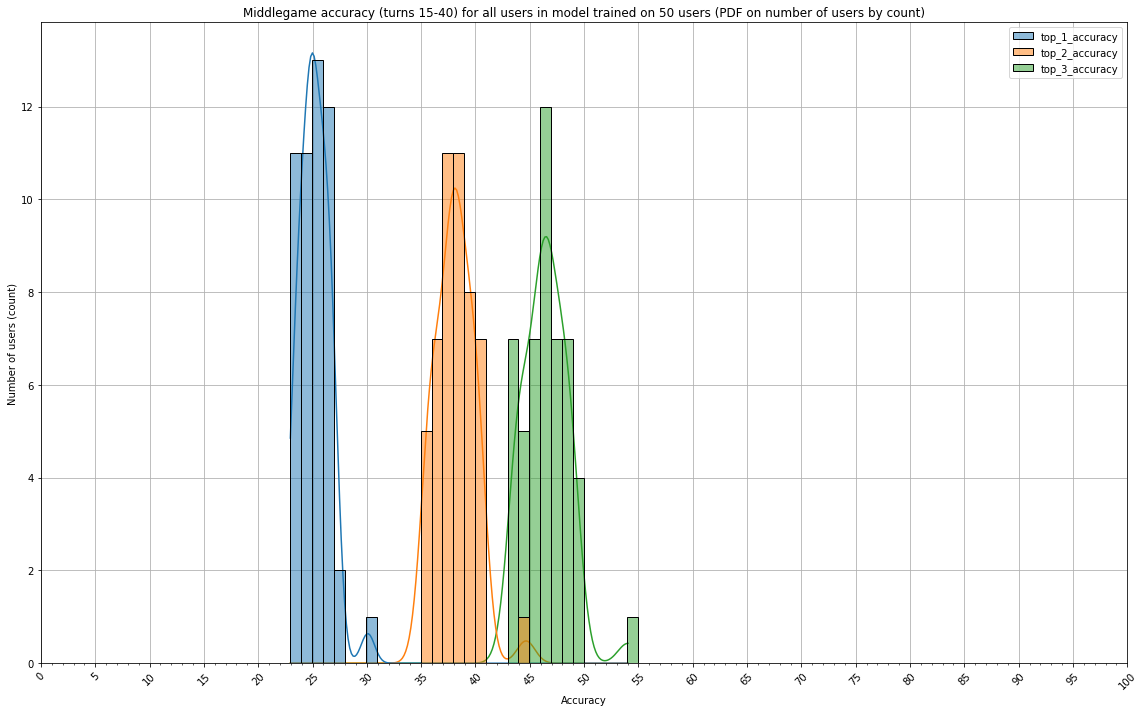

In [27]:
%matplotlib inline
plot_pdf_multiple_users(df_middle, top_k_acc, hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

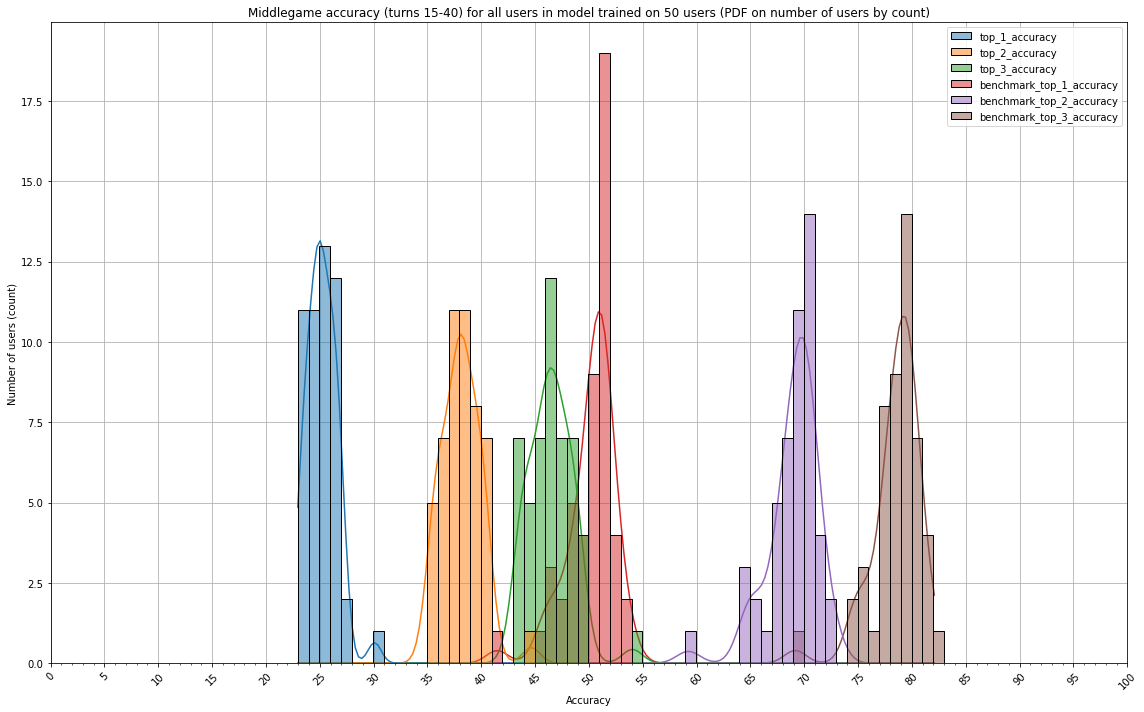

In [84]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_middle, df_middle_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Middlegame accuracy (turns {idx_separate[0]}-{idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (Upper limit at 100 turns)

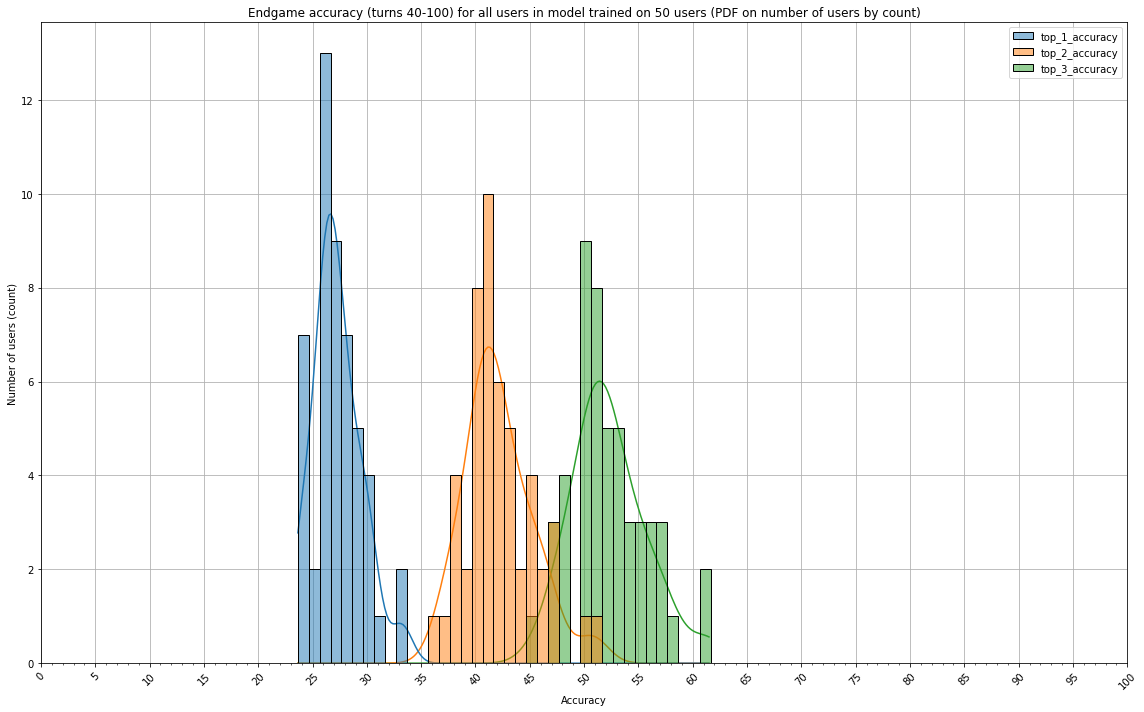

In [28]:
%matplotlib inline
plot_pdf_multiple_users(df_end, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

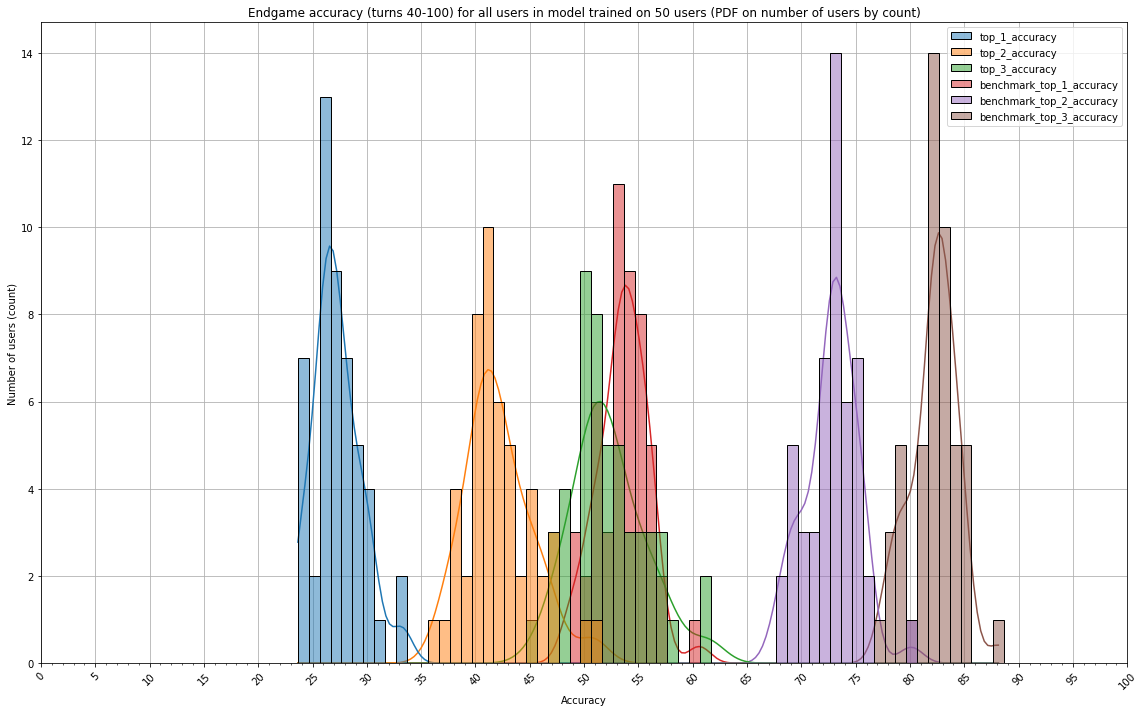

In [85]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end, df_end_bench], axis=1), top_k_acc + top_k_acc_bench,
                        hist_stat=hist_stat,
                        title=(f"Endgame accuracy (turns {idx_separate[1]}-{idx_separate[2]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Endgame accuracy (No upper limit for turns)

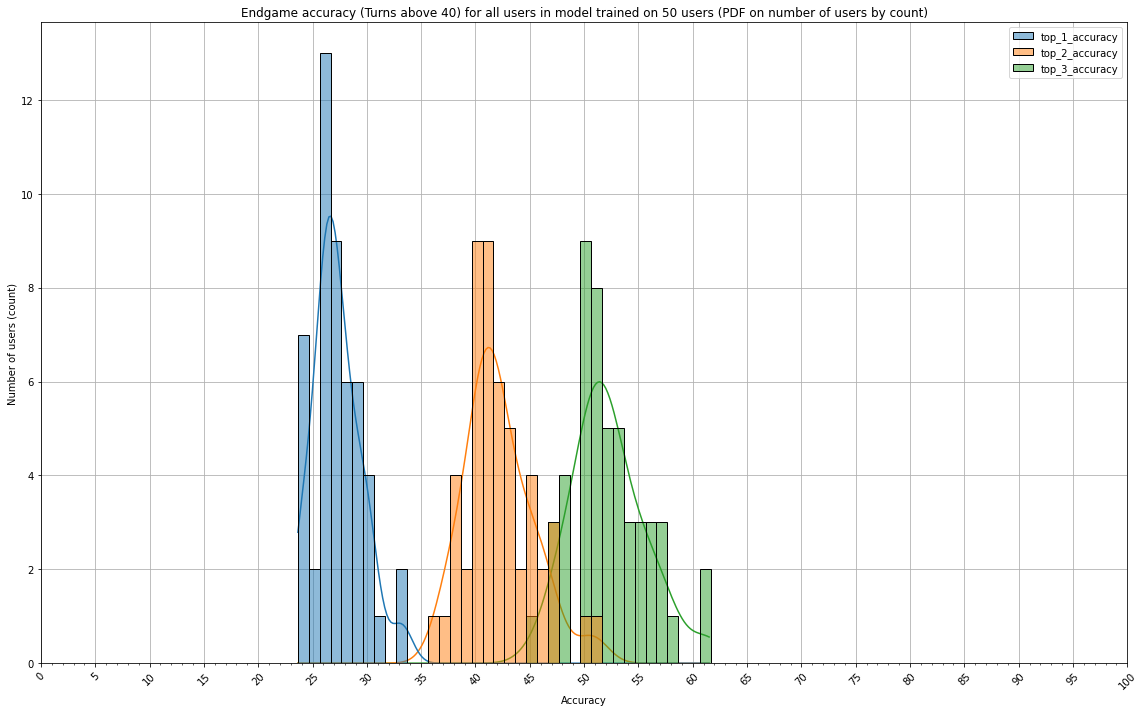

In [29]:
%matplotlib inline
plot_pdf_multiple_users(df_end_uncapped, top_k_acc, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

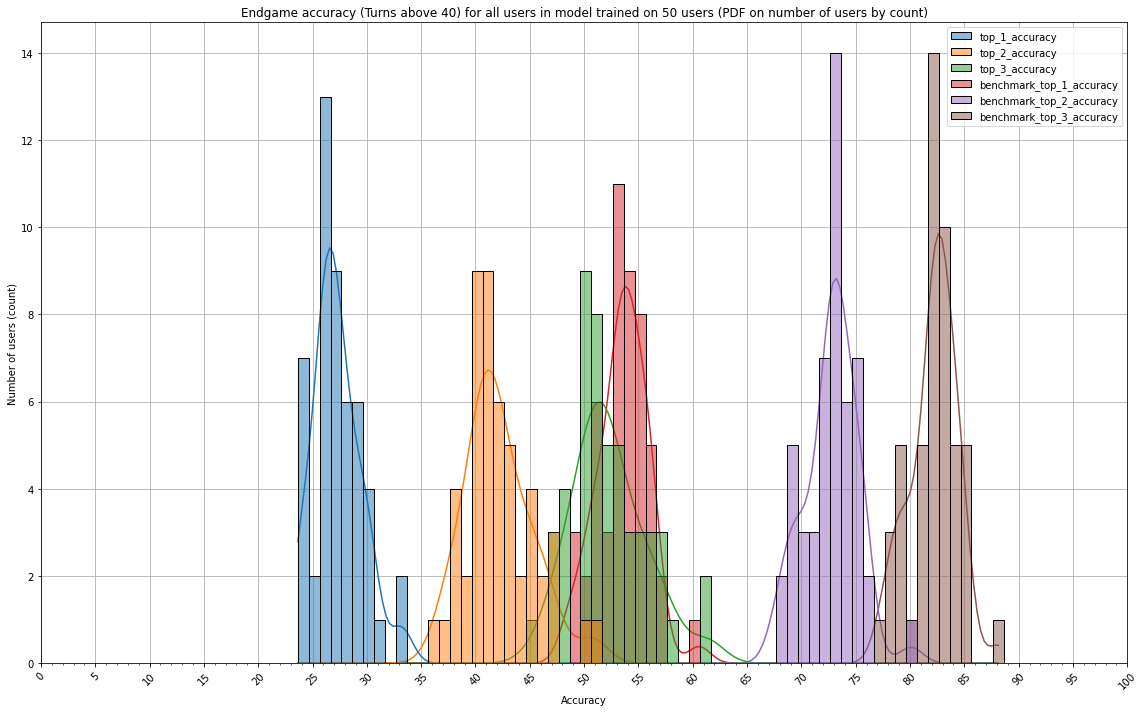

In [86]:
%matplotlib inline
plot_pdf_multiple_users(pd.concat([df_end_uncapped, df_end_uncapped_bench], axis=1),
                        top_k_acc + top_k_acc_bench, hist_stat=hist_stat,
                        title=(f"Endgame accuracy (Turns above {idx_separate[1]})"
                               f" for all users in model trained on {len(model_stats_df)}"
                               f" users (PDF on number of users by {hist_stat})"))

### Game stages comparison (Boxplot)

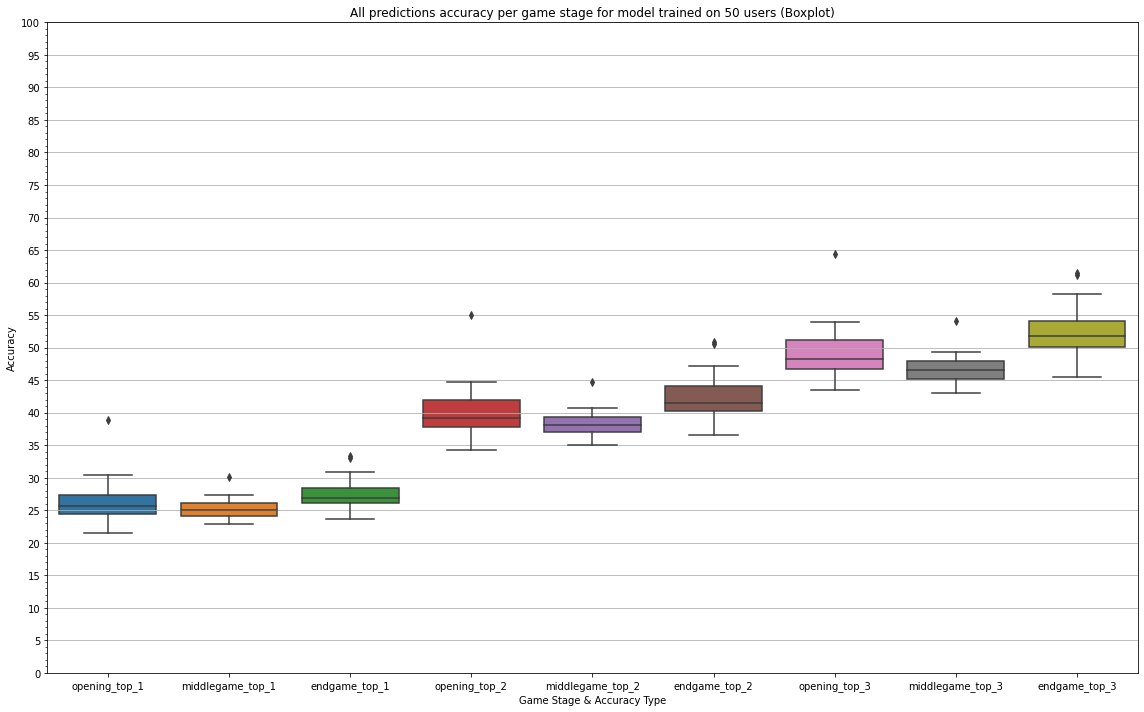

In [90]:
%matplotlib inline
boxplot_game_stages(df_opening, df_middle, df_end)

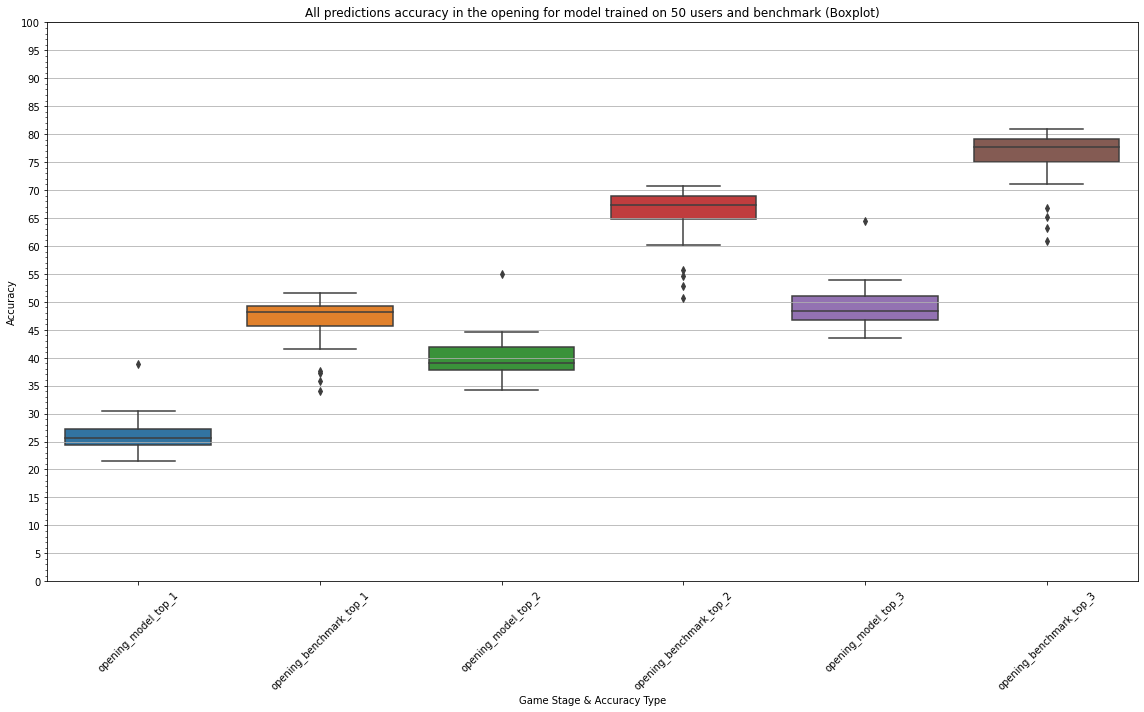

In [94]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_opening, df_opening_bench, 'opening')

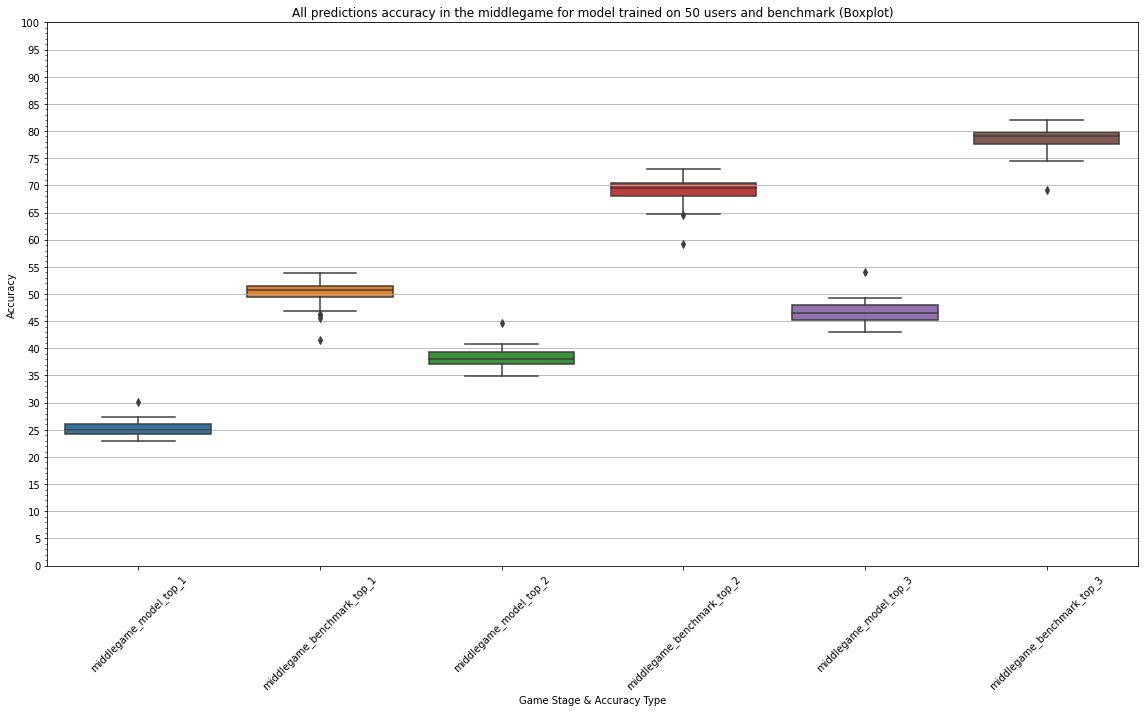

In [95]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_middle, df_middle_bench, 'middlegame')

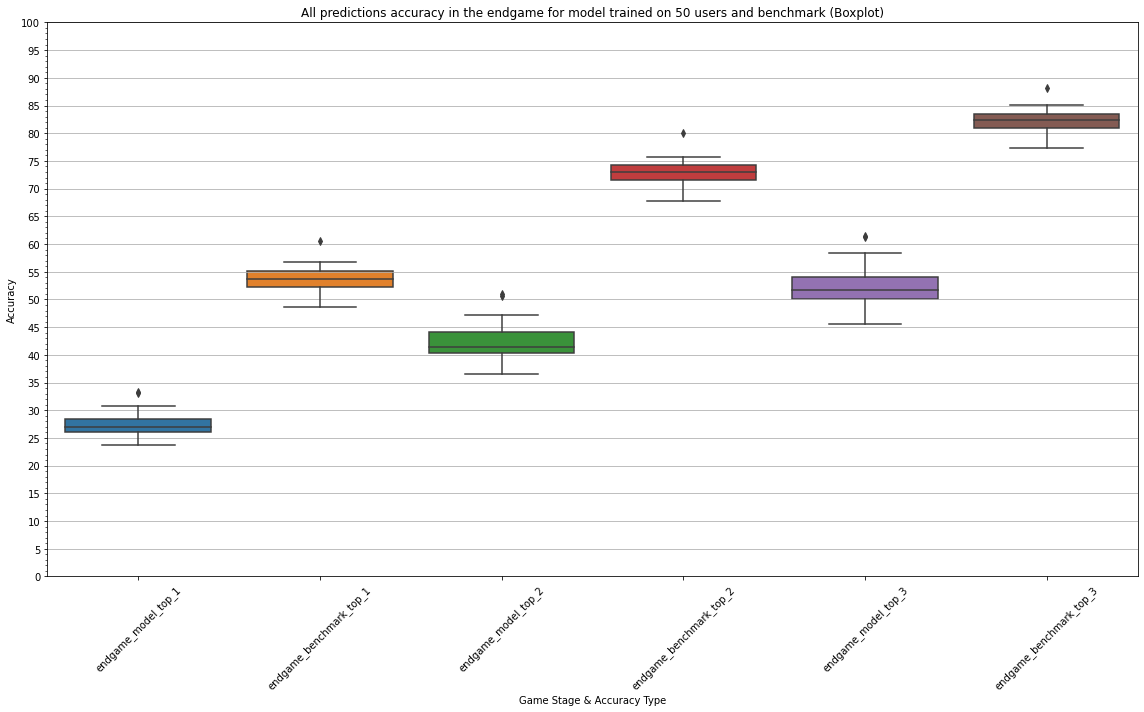

In [96]:
%matplotlib inline
boxplot_game_stages_w_benchmark(df_end, df_end_bench, 'endgame')